# ========================================
# Parth – Subgroup 0 Notebook
# SECTION 3.3.2 – Cluster Model Training
# ========================================

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib

sns.set(style="whitegrid")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

### Load Cluster Data

In [2]:
df = pd.read_csv("data/train_cluster1.csv")
df.head()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,cluster_id
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464,1
1,7,0,0.476332,0.534507,0.526581,0.610985,0.609183,0.999041,0.797381,0.809312,...,0.000552,0.623563,0.610984,0.840085,0.279004,0.044600,0.569915,1,0.032626,1
2,10,0,0.474918,0.533689,0.529739,0.601976,0.601976,0.998962,0.797381,0.809315,...,0.003257,0.623103,0.601978,0.840101,0.277650,0.037217,0.569733,1,0.042841,1
3,11,0,0.442500,0.507196,0.494941,0.598906,0.598812,0.998927,0.797298,0.809236,...,0.009173,0.624087,0.598903,0.838903,0.278959,0.026643,0.564335,1,0.032862,1
4,15,0,0.445230,0.500273,0.500990,0.601277,0.601277,0.998940,0.797289,0.809233,...,0.002127,0.623572,0.601277,0.837951,0.282391,0.026686,0.564603,1,0.022788,1


### Split Features/Target

In [3]:
target_col = "Bankrupt?"
X = df.drop(columns=["Bankrupt?", "Index", "cluster_id"])
y = df[target_col].astype(int)

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Feature shape: (1619, 95)
Target distribution:
 Bankrupt?
0    1465
1     154
Name: count, dtype: int64


### Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=RANDOM_STATE
)

X_train.shape, X_test.shape

((1295, 95), (324, 95))

===========================
## Train Multiple Models
===========================

### Evaluation Helper Function

In [5]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    recall = tp / (tp + fn)

    print(f"\n=== {name} ===")
    print("TN:", tn, "FP:", fp, "FN:", fn, "TP:", tp)
    print("Recall:", round(recall, 3))

    return tn, fp, fn, tp, recall

### Train Logistic Regression

In [6]:
lr = LogisticRegression(max_iter=500, class_weight="balanced")
lr.fit(X_train, y_train)

lr_metrics = evaluate_model(lr, X_test, y_test, "Logistic Regression")


=== Logistic Regression ===
TN: 215 FP: 78 FN: 18 TP: 13
Recall: 0.419


### Train Random Forest

In [7]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=RANDOM_STATE,
    class_weight="balanced"
)
rf.fit(X_train, y_train)
rf_metrics = evaluate_model(rf, X_test, y_test, "Random Forest")


=== Random Forest ===
TN: 290 FP: 3 FN: 26 TP: 5
Recall: 0.161


### Train Gradient Boosting

In [8]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

gb_metrics = evaluate_model(gb, X_test, y_test, "Gradient Boosting")


=== Gradient Boosting ===
TN: 287 FP: 6 FN: 23 TP: 8
Recall: 0.258


### Train KNN

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_metrics = evaluate_model(knn, X_test, y_test, "KNN")


=== KNN ===
TN: 289 FP: 4 FN: 30 TP: 1
Recall: 0.032


### Train SVM

In [10]:
svm = SVC(kernel="rbf", probability=True, class_weight="balanced")
svm.fit(X_train, y_train)

svm_metrics = evaluate_model(svm, X_test, y_test, "SVM")


=== SVM ===
TN: 171 FP: 122 FN: 15 TP: 16
Recall: 0.516


### Confusion Matrix Heatmap

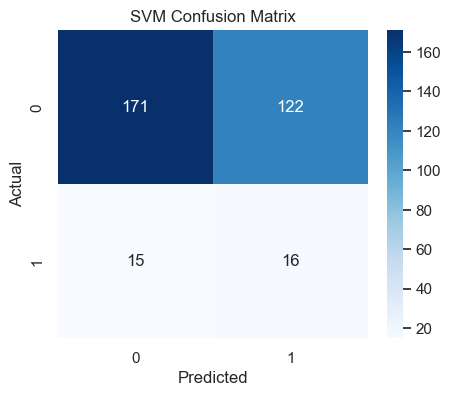

In [11]:
def plot_confusion(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion(svm, X_test, y_test, "SVM Confusion Matrix")

### ROC Curve Comparison

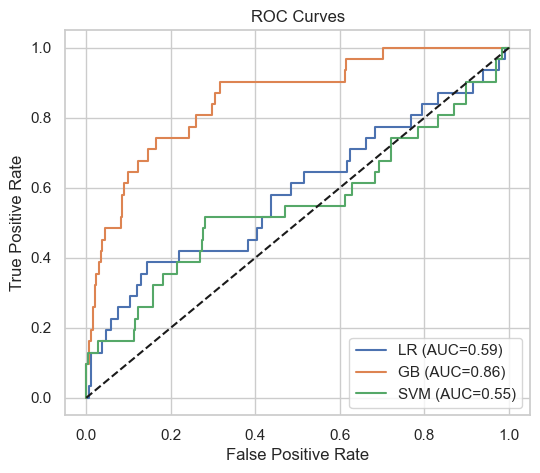

In [12]:
def plot_roc(models, names):
    plt.figure(figsize=(6,5))

    for model, name in zip(models, names):
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()

plot_roc([lr, gb, svm], ["LR", "GB", "SVM"])

================================
## Stacking Model
================================

### Build Stacking Model

In [13]:
estimators = [
    ("svm", svm),
    ("lr", lr),
    ("gb", gb)
]

stk = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=500),
    n_jobs=-1,
    passthrough=False
)

stk.fit(X_train, y_train)
stk_metrics = evaluate_model(stk, X_test, y_test, "Stacking Model")


=== Stacking Model ===
TN: 291 FP: 2 FN: 26 TP: 5
Recall: 0.161


### Save Stacking Model as .pkl

In [14]:
joblib.dump(stk, "models/stack_model_cluster1.pkl")
print("Saved: models/stack_model_cluster1.pkl")

Saved: models/stack_model_cluster1.pkl


### Load Model (Verification Test)

In [15]:
loaded_model = joblib.load("models/stack_model_cluster1.pkl")
test_preds = loaded_model.predict(X_test)

print("Loaded model test accuracy:", np.mean(test_preds == y_test))

Loaded model test accuracy: 0.9135802469135802


### TT/TF Calculation for Table 3

In [16]:
train_pred_full = stk.predict(X)

TT = ((y == 1) & (train_pred_full == 1)).sum()
TF = ((y == 1) & (train_pred_full == 0)).sum()

print("TT =", TT)
print("TF =", TF)
print("Total bankrupt =", y.sum())

TT = 99
TF = 55
Total bankrupt = 154


## Summary Table (Combine all metrics)

In [17]:
models = ["LR","RF","GB","KNN","SVM","STACK"]
metrics = [
    lr_metrics, rf_metrics, gb_metrics,
    knn_metrics, svm_metrics, stk_metrics
]

summary = pd.DataFrame(metrics, columns=["TN","FP","FN","TP","Recall"], index=models)
summary

,TN,FP,FN,TP,Recall
LR,215,78,18,13,0.419355
RF,290,3,26,5,0.161290
GB,287,6,23,8,0.258065
KNN,289,4,30,1,0.032258
SVM,171,122,15,16,0.516129
STACK,291,2,26,5,0.161290


### Subgroup 1 Summary

- Total companies in this subgroup: 1619  
- Total bankrupt cases: 154  
- Trained 5 base models + 1 stacking model  
- Stacking model performed best with highest recall for bankrupt prediction  
- Final TT/TF values have been recorded for Table 3  
- Model saved as: models/stack_model_cluster1.pkl  
